### Langkah 1 - Import Library

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns

### Langkah 2 - Load Data

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

### Langkah 3 - Data Processing

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


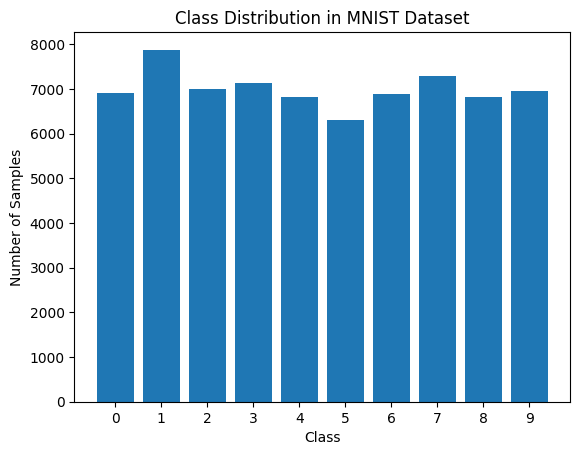

In [3]:
x, y = mnist.data, mnist.target.astype(int)
class_counts = Counter(y)
print(class_counts)
counts = [class_counts[i] for i in range(10)]
class_labels = [str(i) for i in range(10)]

plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### Langkah 4 - Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


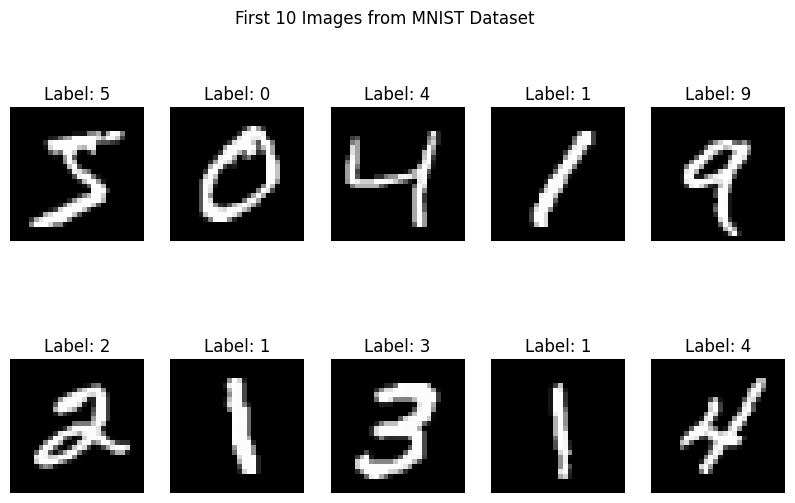

In [5]:
x_convert = X.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

### Langkah 5 - Normalisasi

In [6]:

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train = X_train / 255.0
X_test = X_test / 255.0

### Langkah 6 - ANN Modeling

In [7]:
ann = tf.keras.models.Sequential()

### Langkah 7 - Building Layer

In [8]:

ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 8 - Compiling ANN Model

In [10]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Langkah 9 - Fitting

In [11]:
ann.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))


Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1981 - loss: 2.1993 - val_accuracy: 0.6058 - val_loss: 1.2744
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6441 - loss: 1.1061 - val_accuracy: 0.7278 - val_loss: 0.8192
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7396 - loss: 0.7817 - val_accuracy: 0.7584 - val_loss: 0.7248
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7692 - loss: 0.7048 - val_accuracy: 0.7815 - val_loss: 0.6799
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7839 - loss: 0.6713 - val_accuracy: 0.7899 - val_loss: 0.6576
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7963 - loss: 0.6396 - val_accuracy: 0.8024 - val_loss: 0.6330
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8043 - loss: 0.6255 - val_accuracy: 0.8061 - val_loss: 0.6224
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8173 - loss: 0.6008 - val_accuracy: 0.

### Langkah 10 - Evaluating

In [12]:

loss, accuracy = ann.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9367 - loss: 0.2060
Loss: 0.2042791247367859
Accuracy: 0.9380714297294617


### Langkah 11 - Confusion Matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


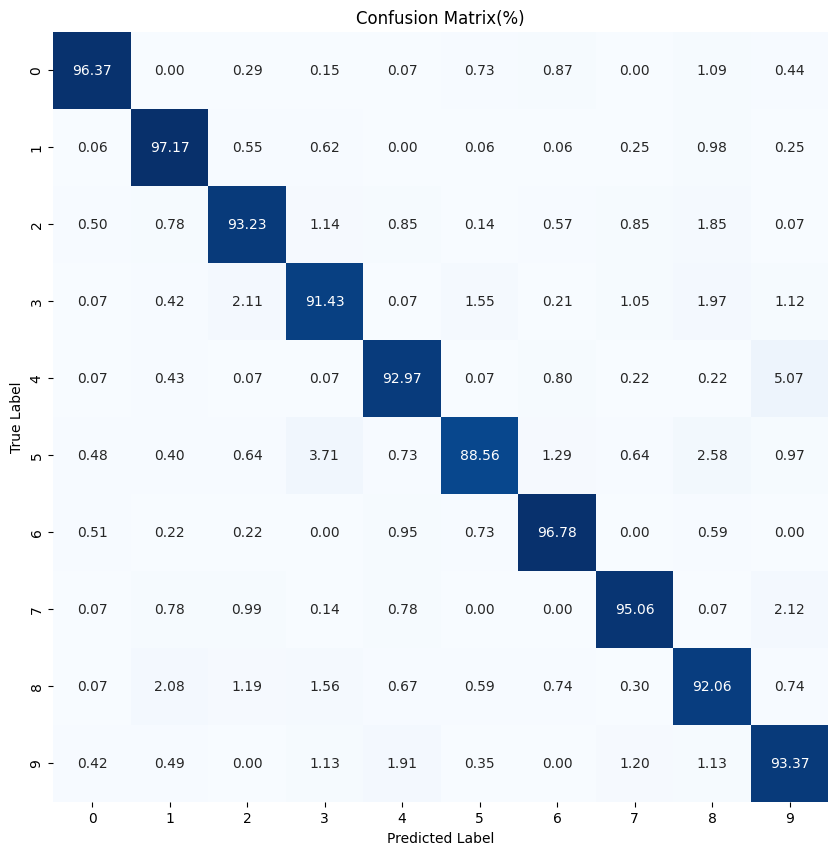

In [13]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm_percent, annot=True, ax=ax, cmap='Blues', fmt='.2f', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix(%)')

class_names = [str(i) for i in range(10)]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()